In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, suppress_output=False)

pipeline_dir='/data/bwedig/mejiro/pipeline_dev'


  0%|          | 0/1028 [00:00<?, ?it/s]

100%|██████████| 1028/1028 [00:09<00:00, 109.77it/s]


Count: 22
('snrs=[126.50642824667246, 123.75108838257322, 100.51207652156874, '
 '137.12081597505082, 125.9636057984709, 195.26014768998752, '
 '112.49920940963271, 104.80839912687578, 107.8759735406356, '
 '121.0711980458968, 112.53183955489271, 119.12245788077863, '
 '147.09981091831256, 135.94691464457702, 100.65853469632906, '
 '108.93695079059303, 101.34141587162433, 130.1479236042187, '
 '100.87036249166864, 101.60370695663072, 159.6262027523527, '
 '108.45806105187049]')


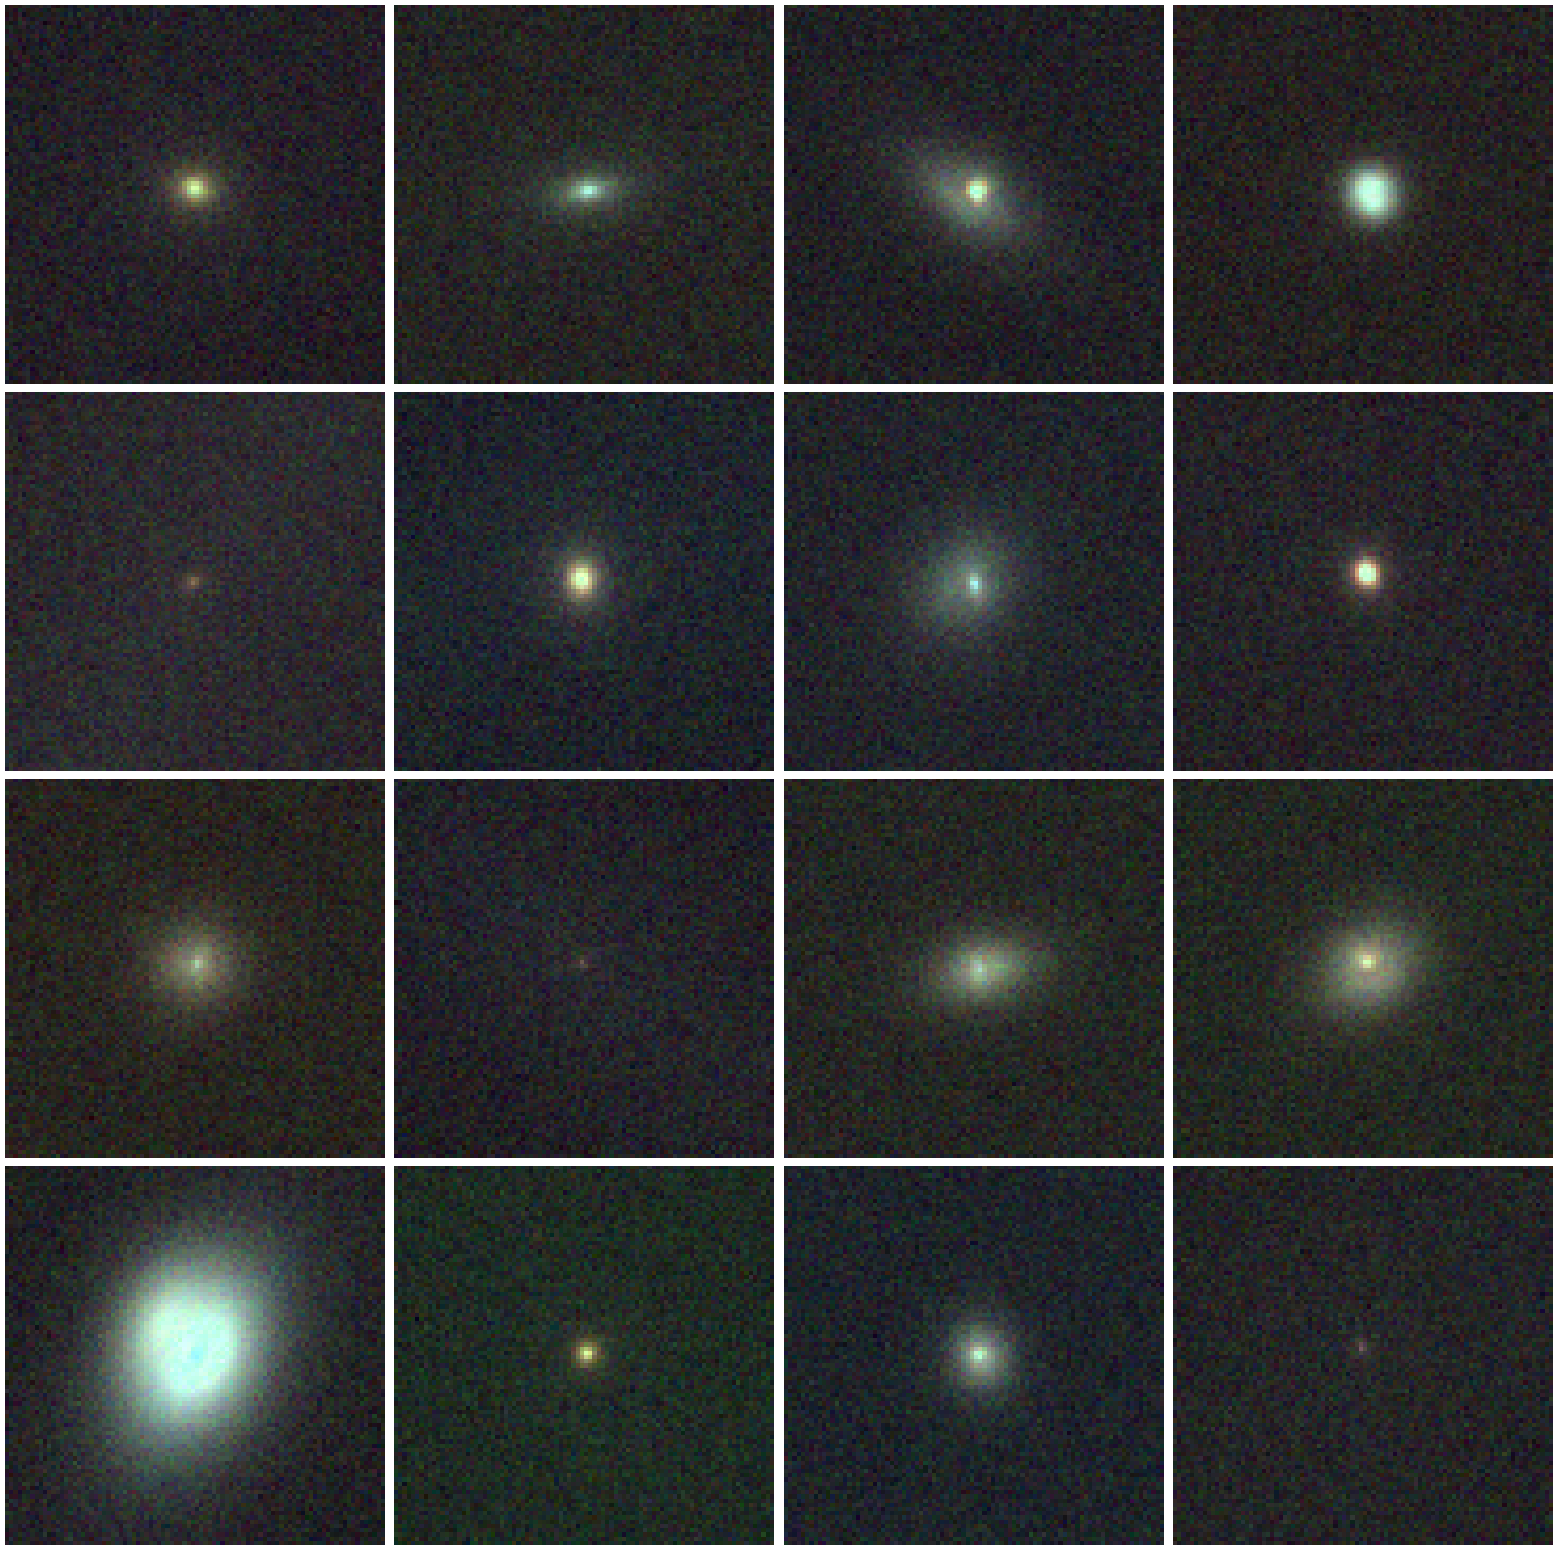

In [6]:
high_snr = [l for l in all_lenses if l.snr > 100]
print(f'Count: {len(high_snr)}')

uids = [l.uid for l in high_snr]
snrs = [l.snr for l in high_snr]
pprint(f'{snrs=}')

color = [lens_util.get_sample(pipeline_dir, index=uid, model=False)[2] for uid in uids]

plot.rgb_plot_grid(color, side=np.floor(np.sqrt(len(high_snr))).astype(int))